Импортируем необходимые библиотеки: 
Keras для создания и обучения моделей, 
Matplotlib для визуализации, 
NumPy для работы с массивами данных, 
и keras.utils для дополнительных утилит Keras.

In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

Загружаем набор данных MNIST, который содержит изображения рукописных цифр и соответствующие им метки. Данные разделены на обучающий и тестовый наборы.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Выводим форму обучающего набора данных, который содержит 60000 изображений размером 28x28 пикселей.

In [3]:
# Смотрим размерность у x_train
x_train.shape  # (60000, 28, 28) кортеж

(60000, 28, 28)

Показывает первое изображение из обучающего набора.

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Визуализирует первое изображение из обучающего набора.

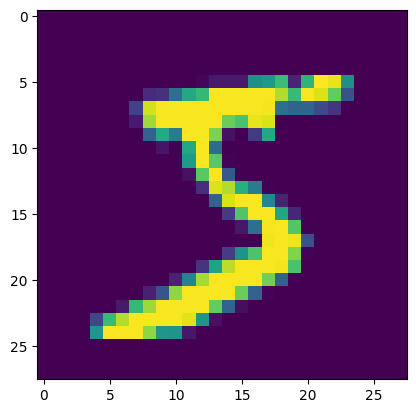

In [5]:
plt.imshow(x_train[0]) # смотрим срез

Визуализирует первые 16 изображений из обучающего набора в сетке 4x4.

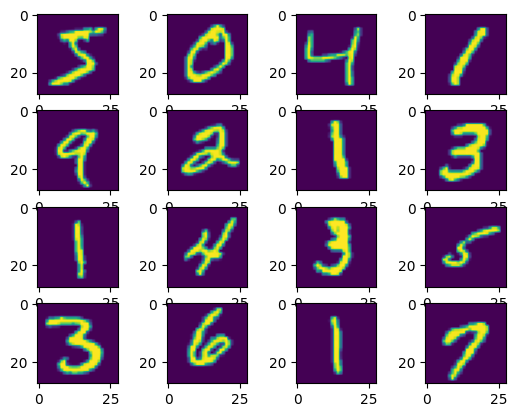

In [6]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
plt.show()

Определяем форму входных данных для модели, где каждое изображение имеет размер 28x28 пикселей и один канал (черно-белое изображение).

In [7]:
input_shape = (28, 28, 1)

Создаем первую модель с одним скрытым слоем с 50 нейронами и выходным слоем с одним нейроном. Модель предназначена для задачи бинарной классификации.

In [8]:
model_1 = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(), # слой сглаживания
    Dense(50),
    Dense(1)
    ])

Компилируем модель с оптимизатором Adam, функцией потерь `categorical_crossentropy` и метрикой точности.

In [9]:
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy', #функция потерь
                metrics=['accuracy'])

Обучаем модель на 5 эпохах с размером партии 32. Замеряем время обучения.

In [10]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


c:\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - accuracy: 0.1150 - loss: 5.2801e-07
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.1139 - loss: 5.3175e-07
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.1140 - loss: 5.3028e-07
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.1153 - loss: 5.2897e-07
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.1125 - loss: 5.3336e-07
CPU times: total: 1.77 s
Wall time: 7.29 s


Нормализуем данные, делив на 255, чтобы значения пикселей были в диапазоне от 0 до 1.

In [11]:
x_train = x_train / 255
x_test = x_test / 255

Преобразуем метки классов в формат one-hot encoding для использования с функцией потерь `categorical_crossentropy`.

In [12]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Создаем вторую модель, аналогичную первой, но с выходным слоем, имеющим 10 нейронов, что соответствует 10 классам в наборе данных MNIST.

In [13]:
model_2 = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(),  # слой сглаживания
    Dense(50),
    Dense(10)
])

Переопределяем вторую модель, добавляя активацию ReLU для скрытого слоя и softmax для выходного слоя, что делает модель подходящей для задачи многоклассовой классификации.

In [14]:
model_2 = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
    ])

Компилируем вторую модель с теми же параметрами, что и первая.

In [15]:
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Обучаем вторую модель на 5 эпохах с размером партии 32. Замеряем время обучения.

In [16]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 775us/step - accuracy: 0.8494 - loss: 0.5380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9515 - loss: 0.1663
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.9644 - loss: 0.1200
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9720 - loss: 0.0967
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.9765 - loss: 0.0786
CPU times: total: 1.31 s
Wall time: 7.73 s


Визуализируем график точности модели во время обучения.

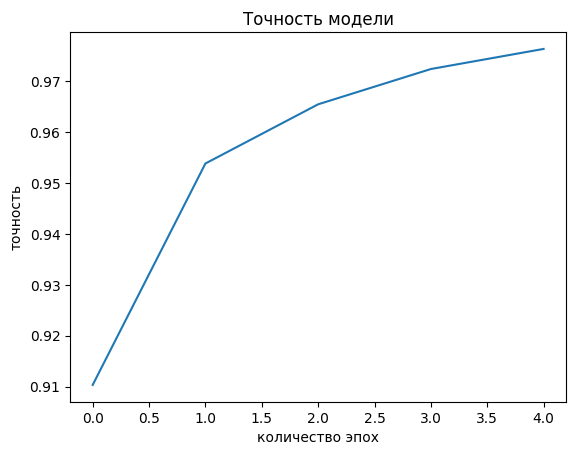

In [17]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

Визуализируем график потерь модели во время обучения.

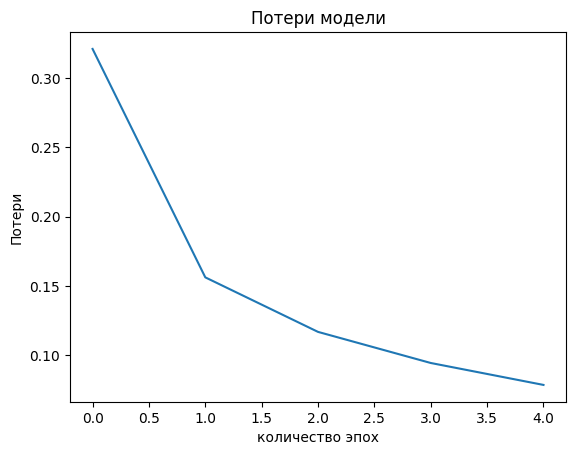

In [18]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

Оцениваем вторую модель на тестовом наборе данных.

In [19]:
model_2.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.9632 - loss: 0.1203


[0.10540294647216797, 0.9672999978065491]

Обучаем вторую модель с использованием валидационных данных, добавляя 5 эпох с размером партии 32. Замеряем время обучения.

In [20]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.9802 - loss: 0.0662 - val_accuracy: 0.9701 - val_loss: 0.0988
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.9838 - loss: 0.0560 - val_accuracy: 0.9706 - val_loss: 0.0992
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.9855 - loss: 0.0496 - val_accuracy: 0.9724 - val_loss: 0.0963
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9865 - loss: 0.0437 - val_accuracy: 0.9727 - val_loss: 0.0938
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9887 - loss: 0.0372 - val_accuracy: 0.9697 - val_loss: 0.1034
CPU times: total: 1.27 s
Wall time: 7.95 s


Визуализируем графики точности модели на обучающем и валидационном наборах данных.

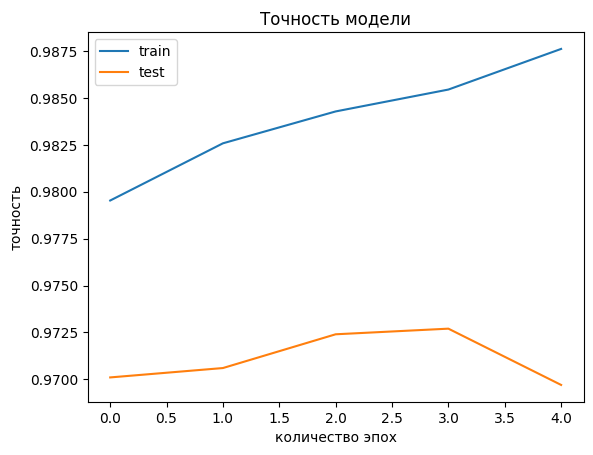

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Визуализируем графики потерь модели на обучающем и валидационном наборах данных.

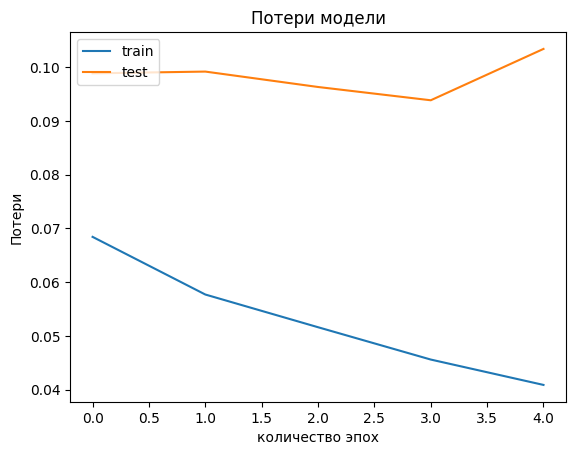

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---